[![Neuronale Netze selbst programmieren](https://raw.githubusercontent.com/che0815/hello-world/master/data/12892.jpg)](https://www.oreilly.de/buecher/12892/9783960090434-neuronale-netze-selbst-programmieren.html)

In [1]:
import numpy as np
import scipy.special
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        self.train_errors = [] 
        pass
    
    def train(self, inputs_list, targets_list):
        inputs  = np.array(inputs_list , ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        output_inputs = np.dot(self.who, hidden_outputs)
        output_outputs = self.activation_function(output_inputs)
        
        output_errors = targets - output_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * output_outputs * (1 - output_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), np.transpose(inputs))
        
        self.train_errors.append(np.sum(output_errors**2)) 
    
        pass
    
    def query(self, inputs_lists):
        inputs = np.array(inputs_lists, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        output_inputs = np.dot(self.who, hidden_outputs)
        output_outputs = self.activation_function(output_inputs)
        
        return output_outputs
    
    def return_wih(self):
        return self.wih
    def return_who(self):
        return self.who
    def return_err(self):
        return self.train_errors
    

In [3]:
def saveNNstate(bla, wih_counter):
    cmap = plt.cm.seismic
    filename = 'NNstate'+str(wih_counter)
    plt.imsave(filename, bla, cmap=cmap, vmin=-0.5, vmax=0.5)
    wih_counter += 1
    return wih_counter

In [4]:
input_nodes   = 28*28
hidden_nodes  = 200
output_nodes  = 10

learning_rate = 0.01

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
wih_counter = 0
wih_counter = saveNNstate(n.return_wih(), wih_counter)


In [5]:
train_file = open('mnist_train.csv', 'r')
train_list = train_file.readlines()
train_file.close()

In [6]:
test_file = open('mnist_test.csv', 'r')
test_list = test_file.readlines()
test_file.close()

In [7]:
epochs = 10
for e in range(epochs):
    # train neural network
    for record in train_list:
        all_values = record.split(',')
        inputs        = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
        scaled_input =  inputs.reshape(28,28)
        very_blurred = scipy.ndimage.gaussian_filter(scaled_input, sigma=1)
        inputs_plus10_img = scipy.ndimage.rotate(scaled_input,  10.0, cval=0.01, order=1, reshape=False)
        inputs_minu10_img = scipy.ndimage.rotate(scaled_input, -10.0, cval=0.01, order=1, reshape=False)
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        n.train(very_blurred.reshape(784), targets)
        n.train(inputs_plus10_img.reshape(784), targets)
        n.train(inputs_minu10_img.reshape(784), targets)
        pass
    wih_counter = saveNNstate(n.return_wih(), wih_counter)
    # test neural network
    scorecard=[]
    for record in test_list:
        all_values    = record.split(',')
        correct_label = int(all_values[0])
        inputs  = (np.asfarray(all_values[1:])/255 * 0.99) + 0.01
        output  = n.query(inputs)
        label   = np.argmax(output)
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
            pass
        pass

    performance = np.asarray(scorecard).sum() / np.asarray(scorecard).size
    print("%.3f %.3f" % (performance, (1-performance)*100))
    pass


0.946 5.360
0.960 3.990
0.968 3.250
0.972 2.820
0.974 2.590
0.976 2.390
0.977 2.340
0.977 2.290
0.977 2.300
0.977 2.300


In [19]:
epoch_performance=np.array([[0.946, 5.360],
[0.960, 3.990],
[0.968, 3.250],
[0.972, 2.820],
[0.974, 2.590],
[0.976, 2.390],
[0.977, 2.340],
[0.977, 2.290],
[0.977, 2.300],
[0.977, 2.300]])

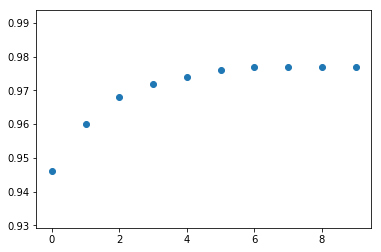

In [32]:
fig1 = plt.scatter(np.arange(0,len(epoch_performance)),epoch_performance[:,0])
plt.savefig('history.png')   # save the figure to file